<a href="https://colab.research.google.com/github/soumya0422/Fertilizer_Prediction_system/blob/main/Fertilizer_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/soumya0422/Fertilizer_Prediction_system/main/Fertilizer%20Prediction.csv"

df = pd.read_csv(url, on_bad_lines='skip', engine='python')  # Skips problematic rows

print(df)


    Temparature  Humidity   Moisture Soil_Type  Crop_Type  Nitrogen  \
0            26         52        38     Sandy      Maize        37   
1            29         52        45     Loamy  Sugarcane        12   
2            34         65        62     Black     Cotton         7   
3            32         62        34       Red    Tobacco        22   
4            28         54        46    Clayey      Paddy        35   
..          ...        ...       ...       ...        ...       ...   
94           25         50        32    Clayey     Pulses        24   
95           30         60        27       Red    Tobacco         4   
96           38         72        51     Loamy      Wheat        39   
97           36         60        43     Sandy    Millets        15   
98           29         58        57     Black  Sugarcane        12   

    Potassium  Phosphorous Fertilizer_Name  
0           0            0            Urea  
1           0           36             DAP  
2           

In [3]:
df

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer_Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10/26/2026
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [4]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil_Type          0
Crop_Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer_Name    0
dtype: int64

In [5]:
df.shape

(99, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil_Type        99 non-null     object
 4   Crop_Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer_Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [9]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame

# Convert specific columns to numeric, handling errors
for col in ['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']: # added a space after 'Humidity'
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numbers, invalid parsing will be set as NaN
    except ValueError: # changed to more general ValueError
        print(f"Warning: Could not convert column '{col}' to numeric. Check for non-numeric values.")

# If you want to ignore non-numeric columns, filter them out:
numerical_df = df.select_dtypes(include=np.number)  # Select only numeric columns for correlation

# Now calculate the correlation on the numerical DataFrame or the modified DataFrame with NaNs:
corr = numerical_df.corr()  # Use numerical_df if you filtered out non-numeric columns
# OR
# corr = df.corr(numeric_only=True)  # Use df if you converted non-numeric to NaNs using pd.to_numeric

# Print the correlation matrix
print(corr)

             Temparature  Humidity   Moisture  Nitrogen  Potassium  \
Temparature     1.000000   0.973164  0.091222 -0.033771  -0.023424   
Humidity        0.973164   1.000000  0.091342 -0.060646  -0.003833   
Moisture        0.091222   0.091342  1.000000 -0.095945   0.027727   
Nitrogen       -0.033771  -0.060646 -0.095945  1.000000  -0.500087   
Potassium      -0.023424  -0.003833  0.027727 -0.500087   1.000000   
Phosphorous     0.207545   0.204044  0.009276 -0.686971   0.089192   

             Phosphorous  
Temparature     0.207545  
Humidity        0.204044  
Moisture        0.009276  
Nitrogen       -0.686971  
Potassium       0.089192  
Phosphorous     1.000000  


In [ ]:
import seaborn as sns; import pandas as pd

# Install seaborn using magic command
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.


<Axes: >

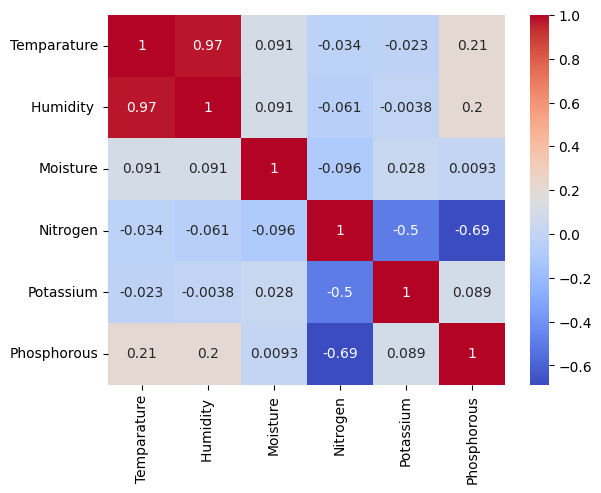

In [13]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

X = df.drop('Fertilizer_Name', axis=1)
y = df['Fertilizer_Name']
# One-hot encoding for categorical columns
categorical_cols = X.select_dtypes(include='object').columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.columns = encoder.get_feature_names_out(categorical_cols)

# Combine encoded categorical data with numeric features
X_final = pd.concat([X_encoded, X.drop(columns=categorical_cols).reset_index(drop=True)], axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Function to predict fertilizer
def recommend_fertilizer(soil_type, crop_type, temperature, humidity, nitrogen, phosphorous, potassium, moisture):
    user_input = pd.DataFrame({
        'Soil_Type': [soil_type],
        'Crop_Type': [crop_type],
        'Temperature': [temperature],
        'Humidity': [humidity],
        'Nitrogen': [nitrogen],
        'Phosphorous': [phosphorous],
        'Potassium': [potassium],
        'Moisture': [moisture]
    })

    # Encode categorical
    user_encoded = pd.DataFrame(encoder.transform(user_input[categorical_cols]))
    user_encoded.columns = encoder.get_feature_names_out(categorical_cols)

    # Combine with numeric
    user_final = pd.concat([user_encoded, user_input.drop(columns=categorical_cols)], axis=1)
    user_final = user_final.reindex(columns=X_final.columns, fill_value=0)

    prediction = model.predict(user_final)[0]
    return prediction

#Get input from the user
print("\n Fertilizer Recommendation System")
soil_type = input("Enter Soil Type (e.g., Loamy, Sandy): ")
crop_type = input("Enter Crop Type (e.g., Rice, Wheat): ")
temperature = float(input("Enter Temperature (°C): "))
humidity = float(input("Enter Humidity (%): "))
nitrogen = int(input("Enter Nitrogen value: "))
phosphorous = int(input("Enter Phosphorous value: "))
potassium = int(input("Enter Potassium value: "))
moisture = float(input("Enter Moisture (%): "))

# Make prediction
result = recommend_fertilizer(
    soil_type, crop_type, temperature, humidity, nitrogen, phosphorous, potassium, moisture
)

print(f"\n Recommended Fertilizer: **{result}**")




 Fertilizer Recommendation System

 Recommended Fertilizer: **Urea**


In [15]:
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 95.00%


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Fertilizer Prediction.csv")

# Print unique crop types
print(df['Crop_Type'].unique())


['Maize' 'Sugarcane' 'Cotton' 'Tobacco' 'Paddy' 'Barley' 'Wheat' 'Millets'
 'Oil seeds' 'Pulses' 'Ground Nuts']
